In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("CarPricePrediction.csv")

# Data Cleaning

In [3]:
df.shape

(7151, 11)

In [4]:
df.head()

,Unnamed: 0,myear,fuel,km,owner,transmission,brand,model,variant,price,city
0,0,2016.0,Petrol,"81,674 Kms",1st Owner,Manual,2016 Maruti Wagon R,2016 Maruti Wagon R,VXI,"3,60,000",Ahmedabad
1,1,2012.0,Petrol,"89,579 Kms",1st Owner,Manual,2012 Maruti Alto K10,2012 Maruti Alto K10,LXI,"1,77,500",Ahmedabad
2,2,2011.0,Petrol,"38,647 Kms",1st Owner,Manual,2011 Honda City,2011 Honda City,1.5 V MT,"3,99,500",Ahmedabad
3,3,2019.0,Petrol,"9,718 Kms",1st Owner,Manual,2019 Maruti Swift Dzire,2019 Maruti Swift Dzire,VXI 1.2,"6,65,000",Ahmedabad
4,4,2019.0,Petrol,"24,230 Kms",1st Owner,Manual,2019 Maruti S-Presso,2019 Maruti S-Presso,VXI,"4,22,000",Ahmedabad


In [5]:
df.dtypes

Unnamed: 0        int64
myear           float64
fuel             object
km               object
owner            object
transmission     object
brand            object
model            object
variant          object
price            object
city             object
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0         0
myear             16
fuel              16
km                16
owner             16
transmission      17
brand             17
model             17
variant         4536
price             17
city               0
dtype: int64

In [7]:
df['variant'].value_counts()

VXI                         174
Delta                       171
Sportz                      135
1.2 Kappa Magna BSIV        109
VDi                         107
                           ... 
i DTEC E                      1
2.5 VX (Diesel) 8 Seater      1
1.5 Diesel Trend              1
XL Plus 85 PS                 1
VX i-DTEC                     1
Name: variant, Length: 272, dtype: int64

In [8]:
df['fuel'].value_counts()

Petrol    4131
Diesel    2962
CNG         30
LPG         12
Name: fuel, dtype: int64

In [9]:
df['owner'].value_counts()

First Owner             3315
1st Owner               2177
Second Owner            1013
2nd Owner                437
Third Owner              151
Fourth & Above Owner      30
Test Drive Car            10
3rd Owner                  2
Name: owner, dtype: int64

In [10]:
df['transmission'].value_counts()

Manual       5346
Automatic    1608
RJ45           53
RJ14           52
KA50           23
KA04           10
KA53            7
DL9C            5
KA03            5
KA01            3
TS08            3
KA02            3
DL5C            3
DL6C            2
DL3C            2
DL7C            2
DL4C            2
TS10            1
AP36            1
KA05            1
AP23            1
DL12            1
Name: transmission, dtype: int64

In [11]:
df['variant'].value_counts()

VXI                         174
Delta                       171
Sportz                      135
1.2 Kappa Magna BSIV        109
VDi                         107
                           ... 
i DTEC E                      1
2.5 VX (Diesel) 8 Seater      1
1.5 Diesel Trend              1
XL Plus 85 PS                 1
VX i-DTEC                     1
Name: variant, Length: 272, dtype: int64

In [12]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Unnamed: 0,myear,fuel,km,owner,transmission,brand,model,variant,price,city


In [13]:
df.columns

Index(['Unnamed: 0', 'myear', 'fuel', 'km', 'owner', 'transmission', 'brand',
       'model', 'variant', 'price', 'city'],
      dtype='object')

Cleaning km data

In [14]:
df["km"] = df["km"].str.strip("Kms")
df["km"] = df["km"].str.strip("k")
df["km"] = df["km"].str.strip()
df["km"] = df["km"].str.replace(',','')


In [15]:
df["price"] = df["price"].str.strip()
df["price"] = df["price"].str.replace(',','')

cleaning owner data

In [16]:
df["owner"] = df["owner"].str.replace('1st Owner','First Owner')
df["owner"] = df["owner"].str.replace('2nd Owner','Second Owner')
df["owner"] = df["owner"].str.replace('3rd Owner','Third Owner')


Cleaning brand and model data

In [17]:
for i in range(0,len(df['brand'])):
    #print(i)
    x= str(df['brand'][i]).split(" ")
    if(len(x)>1):
        df["brand"][i]= x[1]

In [18]:
for i in range(0,len(df['model'])):
    #print(i)
    x= str(df['model'][i]).split(" ")
    if(len(x)>1):
        df["model"][i]= "".join(x[2:])

In [19]:
df['brand']

0       Maruti
1       Maruti
2        Honda
3       Maruti
4       Maruti
         ...  
7146    Maruti
7147    Maruti
7148    Maruti
7149    Maruti
7150       NaN
Name: brand, Length: 7151, dtype: object

Replacing Null values

In [20]:
df['myear']=df['myear'].fillna(df['myear'].median())
df['fuel']=df['fuel'].fillna(df['fuel'].mode()[0].strip())
df['km']=df['km'].fillna(df['km'].mode()[0].strip())
df['owner']=df['owner'].fillna(df['owner'].mode()[0].strip())
df['transmission']=df['transmission'].fillna(df['transmission'].mode()[0].strip())
df['brand']=df['brand'].fillna(df['brand'].mode()[0].strip())
df['model']=df['model'].fillna(df['model'].mode()[0].strip())
df['variant']=df['variant'].fillna(df['variant'].mode()[0].strip())
df['price']=df['price'].fillna(df['price'].mode()[0].strip())

In [21]:
df.isnull().sum()

Unnamed: 0      0
myear           0
fuel            0
km              0
owner           0
transmission    0
brand           0
model           0
variant         0
price           0
city            0
dtype: int64

In [22]:
df["km"] = df["km"].astype(str).astype(int)

In [23]:
df.isnull().sum()

Unnamed: 0      0
myear           0
fuel            0
km              0
owner           0
transmission    0
brand           0
model           0
variant         0
price           0
city            0
dtype: int64

In [24]:
df["price"] = df["price"].str.strip()
df["price"] = df["price"].str.replace(',','')



Cleaning price data

In [25]:
New_price=[]

In [26]:
for i in range(0,len(df['price'])):
    #print(i)
    x= str(df['price'][i]).split(" ")
    if(len(x)>1):
        if x[1]=='Lakh*' and float(x[0])>0:
            n = float(x[0])*100000
            df["price"][i] = n
            New_price.append(n)
    elif x[0][len(x[0])-1]=='*':
        New_price.append(x[0][:len(x[0])-1])
    else:
        New_price.append(x[0])


In [27]:
df.drop('price',axis=1,inplace=True)

In [29]:
df = df.assign(price=New_price)

In [31]:
for i in range(0,len(df['price'])):
    if(df['price'][i]=='*'):
        print(df['price'][i])

In [33]:
df["price"] = df["price"].astype(str).astype(float)

In [34]:
df.dtypes

Unnamed: 0        int64
myear           float64
fuel             object
km                int32
owner            object
transmission     object
brand            object
model            object
variant          object
city             object
price           float64
dtype: object

In [36]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
df.columns

Index(['myear', 'fuel', 'km', 'owner', 'transmission', 'brand', 'model',
       'variant', 'city', 'price'],
      dtype='object')

In [45]:
categorical=['fuel','owner', 'transmission', 'city']
continous = ['myear','km','price']

# Visualization

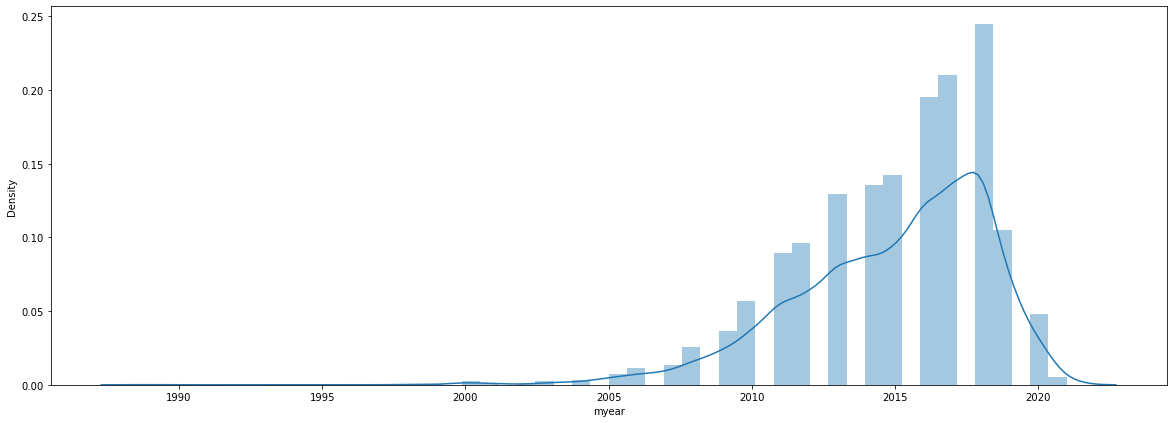

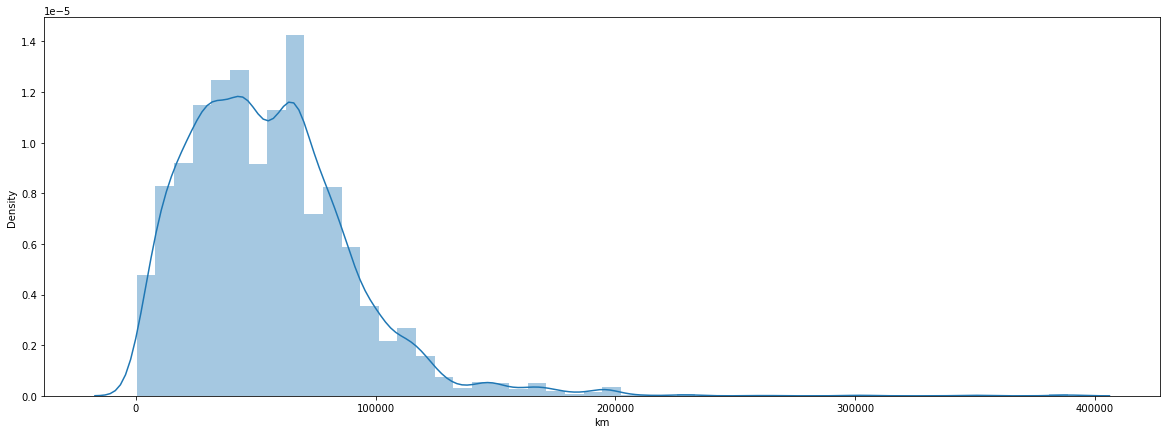

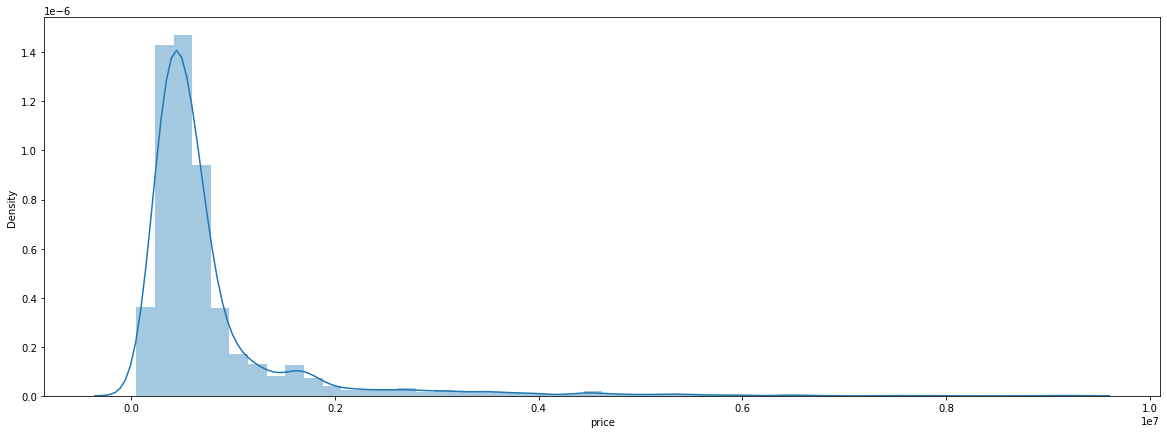

In [40]:

counter=1;
for i in range(0,len(continous)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.distplot(df[continous[i]])
        plt.show()

    Observations:
           1) most of the cars were maked between 2015-2020 
           2) most of the cars have travelled less than 100000 and the data in km is not normally distrbiuted

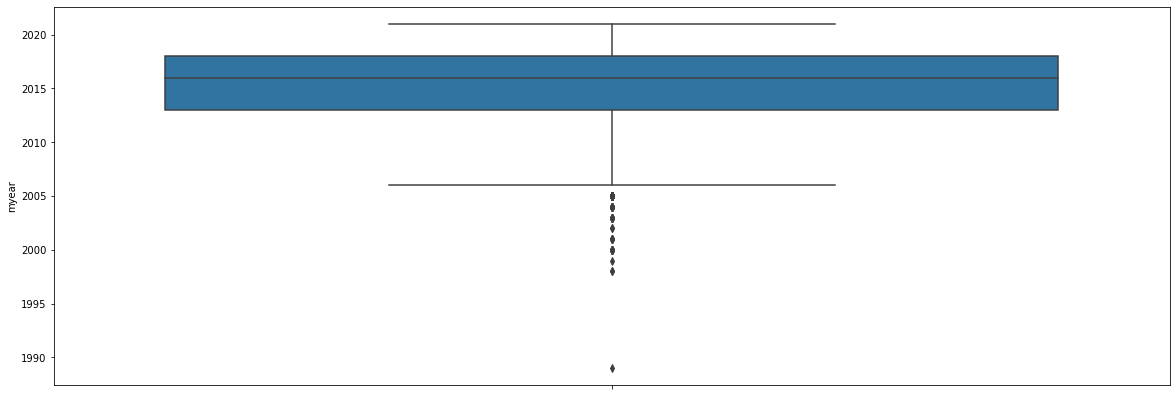

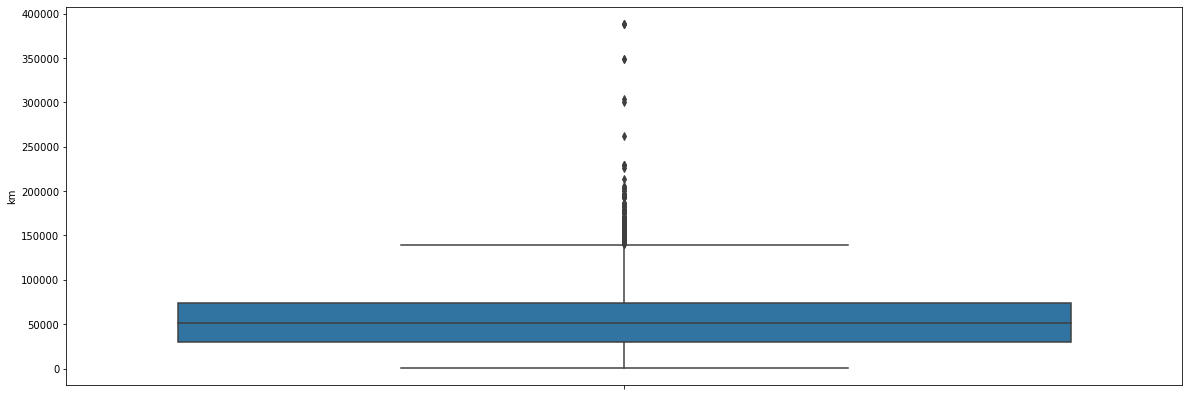

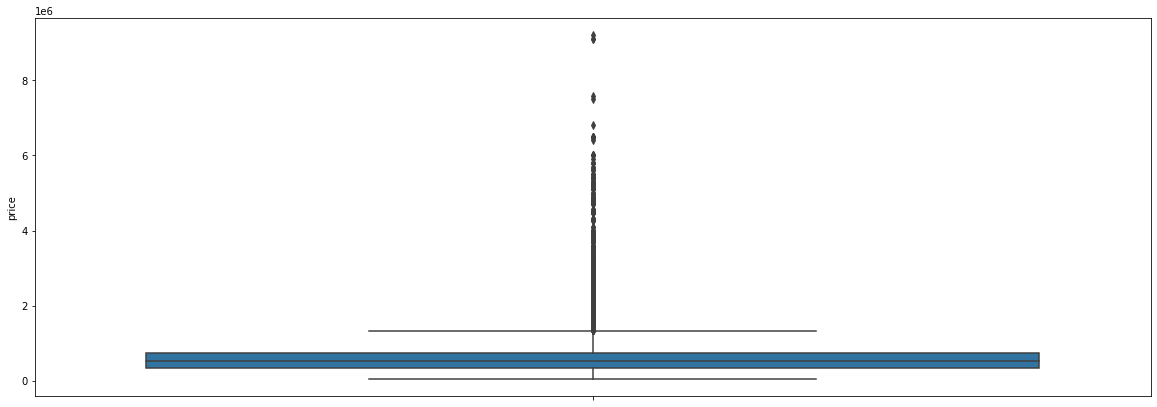

In [41]:

counter=1;
for i in range(0,len(continous)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous[i],hue = continous[i],data=df)
        plt.show()

        observations:
            1) columns myear, price and km contains outliers

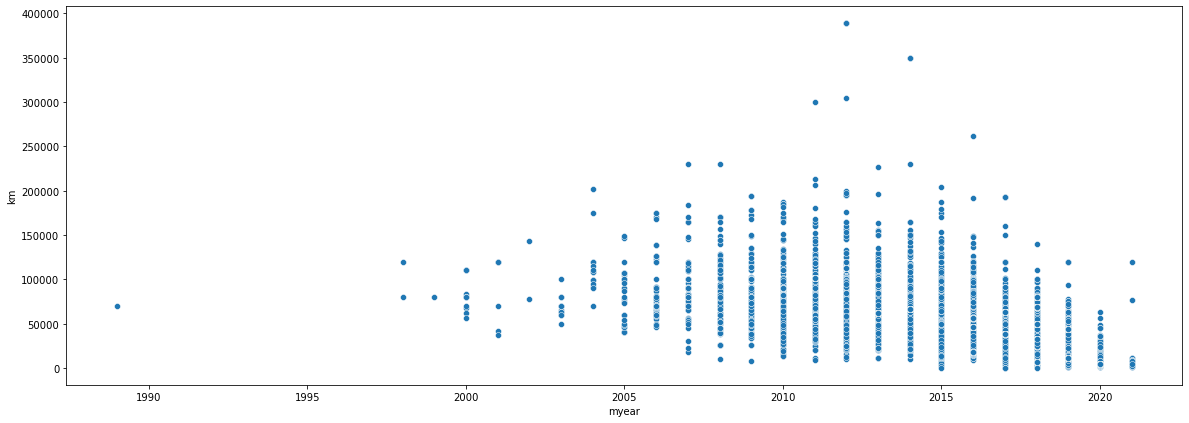

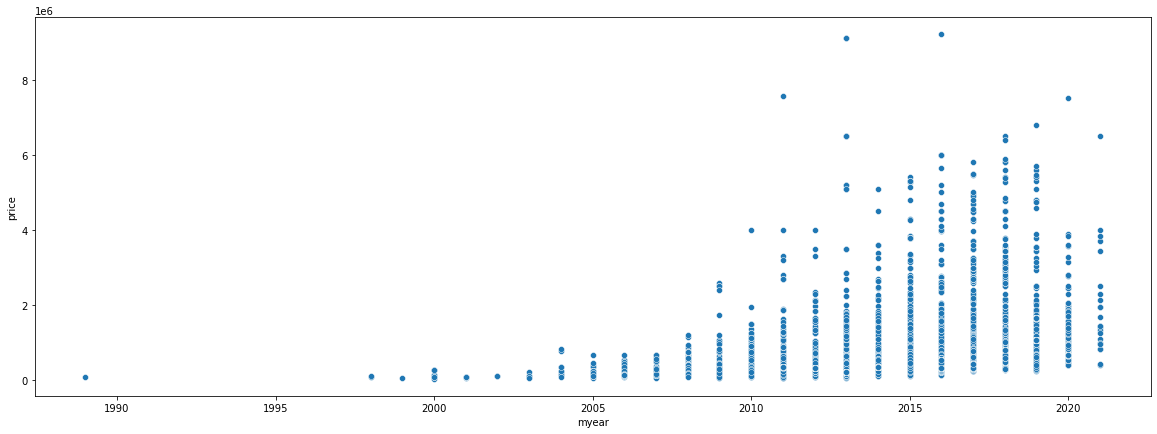

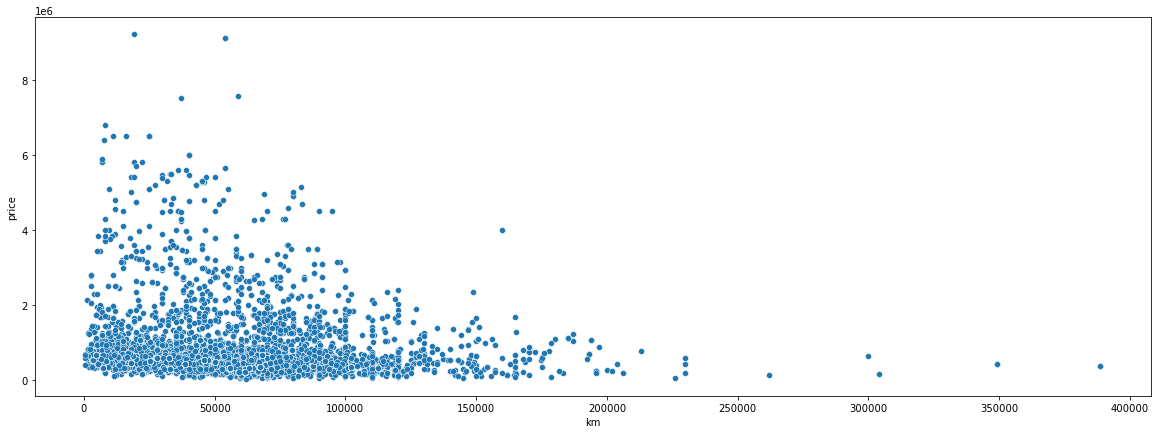

In [43]:

counter=1;
for i in range(0,len(continous)):
    for r in range(i+1,len(continous)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.scatterplot(x=continous[i],y=continous[r],data=df)
        plt.show()

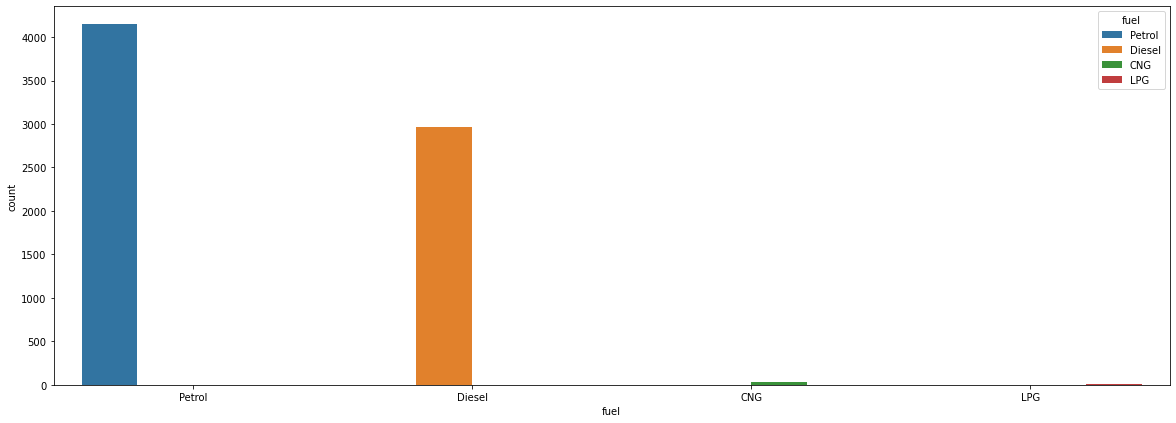

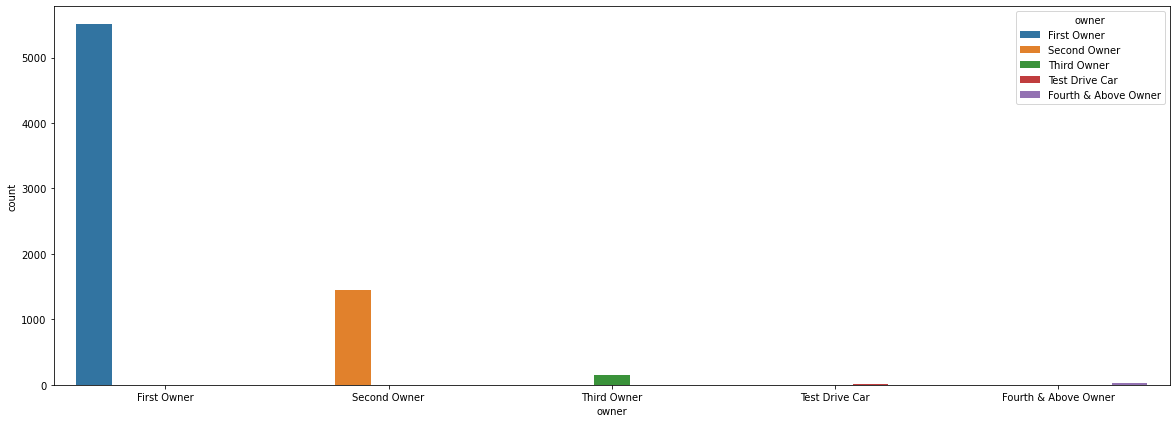

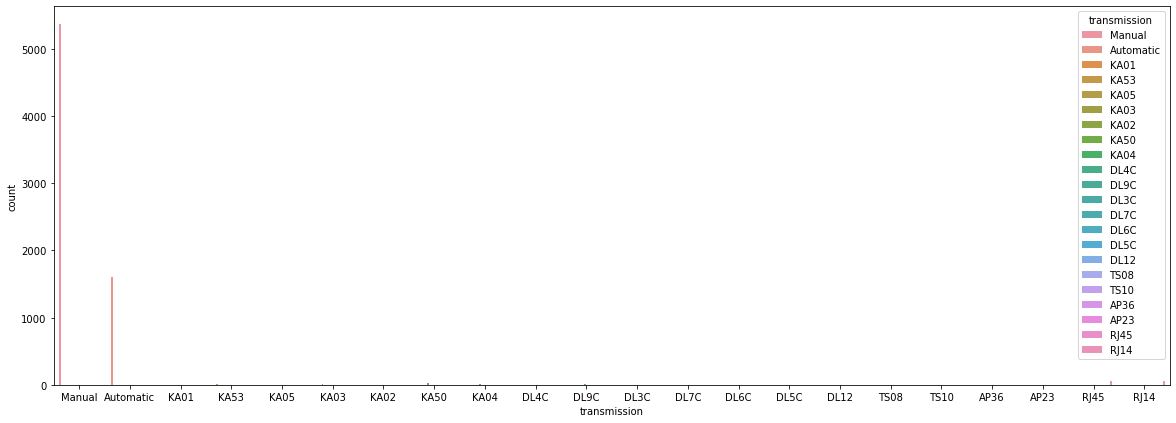

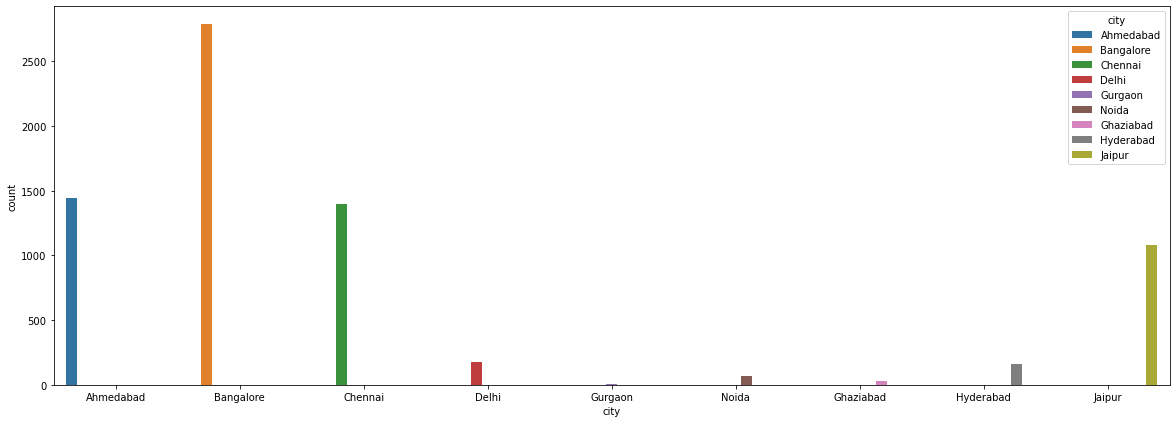

In [46]:
counter=1;
for column in categorical:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.countplot(x=column,hue=column,data=df)
        plt.show()

    In the dataset we have mostly petrol cars
    In the dataset we have mostly 1st owned cars
    In the dataset most of the cars are from Bangalore city
    In the dataset we have mostly Manual transmission

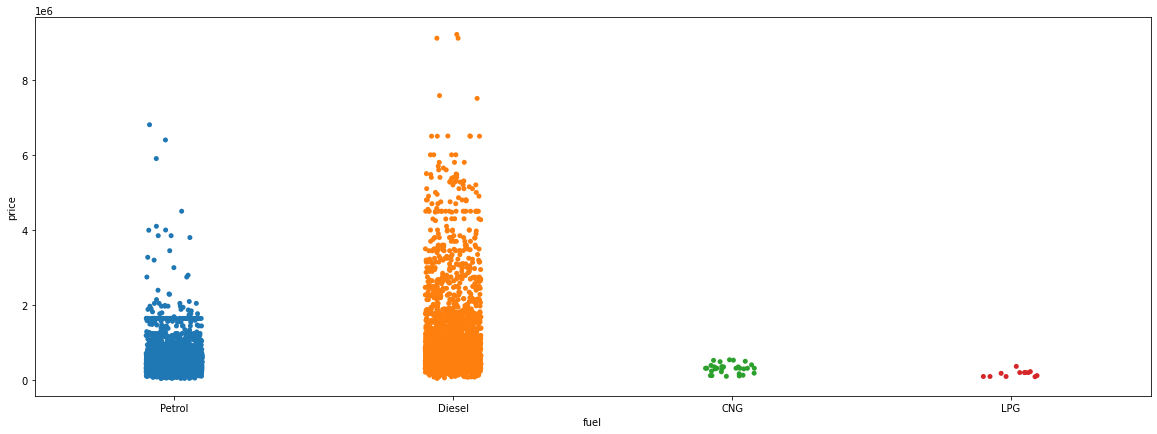

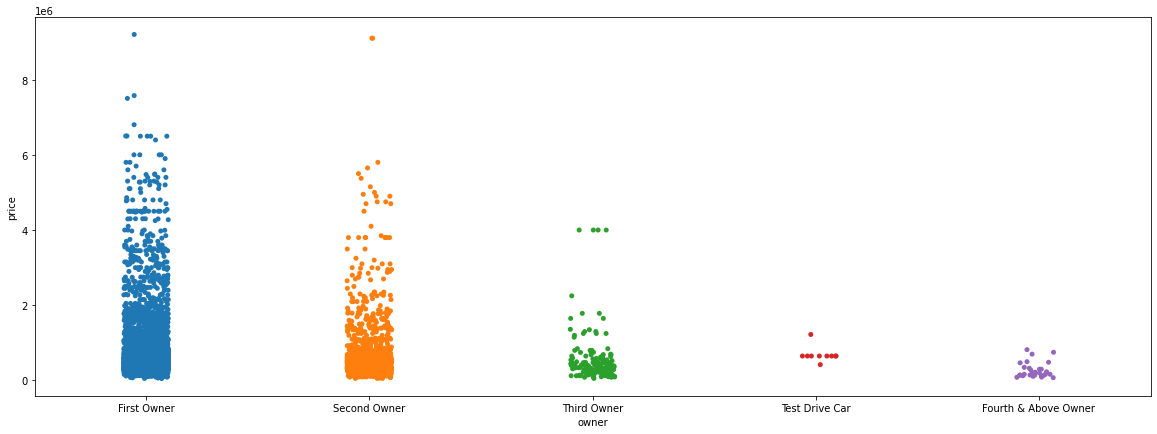

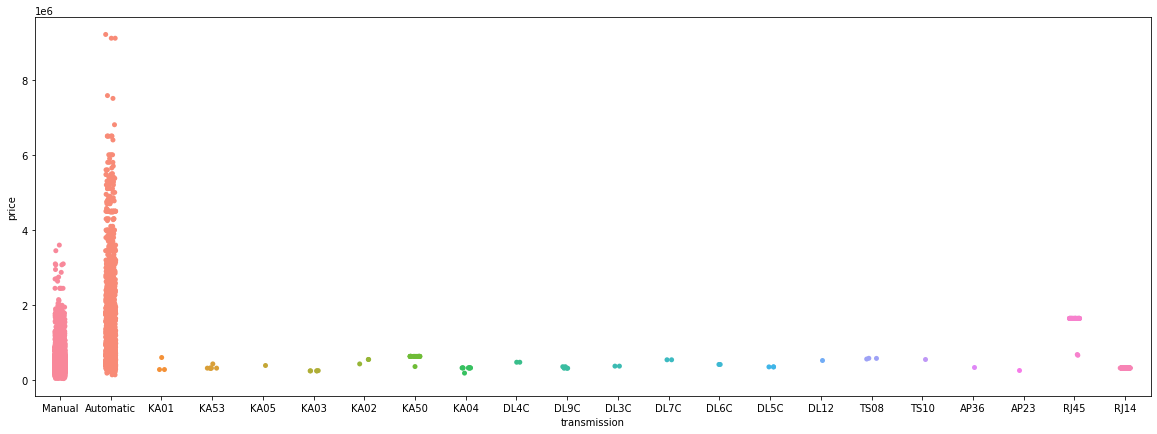

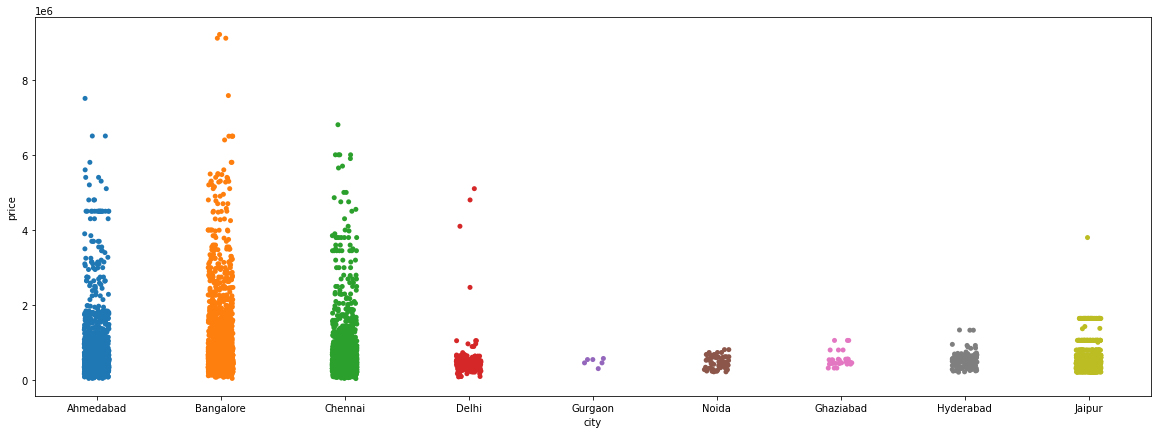

In [47]:
counter=1;


for column in categorical:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="price", data=df)
        plt.show()

    Observations: 
    1) Automatic transmission cars have higher price rate then other tramissions
    2) First owned cars have higher price rate then other 
    3) Diesel cars have hight price then other fueled cars
    4) Cars sold in Bangalore city have higher price rate

# Data Transformation

In [60]:
categorical_columns=['fuel','owner', 'transmission', 'city','model','brand','variant']

Labeling the categorical data

In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] =  LE.fit_transform(df[col])

Removing Outliers

In [62]:
for i in continous:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

Scaling the data

In [63]:
fin_df  = df.drop(categorical_columns,axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [64]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

In [65]:
fin_df_new.skew()

myear   -0.134341
km       0.021675
price    0.087333
dtype: float64

In [66]:
#fin_df_new= fin_df_new.join(df['price'])
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [67]:
x = fin_df_new.drop('price',axis=1)
y = fin_df_new['price']

# Model Building

Train test split

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.6202674492744558 on Random State 192


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=192)

Linear Regression

In [70]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.6202674492744558
MAE: 0.48815064071651004
MSE: 0.3945003290810261
RMSE: 0.6280926118662964


Ridge

In [71]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.6202673953963928
MAE: 0.4881508000019625
MSE: 0.39450038505440405
RMSE: 0.6280926564245152


Lasso

In [72]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.6194658467308831
MAE: 0.48988157757124656
MSE: 0.3953331059041543
RMSE: 0.6287552034807778


Elastic Net

In [73]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.6197703017133225
MAE: 0.4893521332974955
MSE: 0.39501681068391786
RMSE: 0.6285036282185791


Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.8446425341046835
MAE: 0.17782074133578957
MSE: 0.1613993093396768
RMSE: 0.4017453289581309


Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.9065771666954345
MAE: 0.16004338581527627
MSE: 0.09705604223792372
RMSE: 0.31153818744725936


Cross validation

In [76]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5).mean())

Cross validation score: 0.469778575773001


In [77]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())

Cross validation score: 0.4697791840219733


In [78]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())

Cross validation score: 0.4937852412179982


In [79]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())

Cross validation score: 0.4843757853968661


In [80]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())

Cross validation score: 0.5632407179154744


In [81]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5).mean())

Cross validation score: 0.7233167522391171


Hyper parameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameter = {
 'max_depth': [100, 400, 800,1200],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800, 1200],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400, 800]})

In [85]:
GCV.best_params_

{'max_depth': 1200,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

Final model

In [87]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 1200,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 400)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.9043493308018354
MAE: 0.16145031959358103
MSE: 0.09937051854890654
RMSE: 0.31523089719903175


In [88]:
import joblib
joblib.dump(rdr,"car.pkl")
